In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Importing Dataset
data=pd.read_csv('top50.csv', encoding='ISO-8859-1')
data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [6]:
print(data.shape)

(50, 14)


In [7]:
data=data.dropna(how='all')

In [8]:
print(data.groupby('Genre').size())

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


In [9]:
data.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [10]:
data=data.sort_values(['Unnamed: 0'])
data=data.reindex(data['Unnamed: 0'])
data=data.drop("Unnamed: 0",axis=1)
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Unnamed: 0,,,,,,,,,,,,,
1,China,Anuel AA,reggaeton flow,105.0,81.0,79.0,-4.0,8.0,61.0,302.0,8.0,9.0,92.0
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40.0,-4.0,16.0,70.0,186.0,12.0,46.0,85.0
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64.0,-8.0,8.0,55.0,198.0,12.0,19.0,86.0
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65.0,58.0,-4.0,11.0,18.0,175.0,45.0,7.0,94.0
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102.0,68.0,80.0,-5.0,9.0,84.0,220.0,9.0,4.0,84.0


In [11]:
data.describe()


,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,120.122449,64.244898,71.285714,-5.653061,14.795918,54.183673,201.163265,22.530612,12.673469,87.673469
std,31.215403,14.318593,12.034672,2.077168,11.191477,22.370622,39.522856,19.008882,11.192236,4.365527
min,85.000000,32.000000,29.000000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,56.000000,67.000000,-7.000000,8.000000,38.000000,176.000000,9.000000,5.000000,86.000000
50%,104.000000,68.000000,73.000000,-6.000000,11.000000,55.000000,198.000000,15.000000,7.000000,88.000000
75%,138.000000,75.000000,80.000000,-4.000000,16.000000,68.000000,218.000000,34.000000,15.000000,91.000000
max,190.000000,88.000000,90.000000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
Track.Name          49 non-null object
Artist.Name         49 non-null object
Genre               49 non-null object
Beats.Per.Minute    49 non-null float64
Energy              49 non-null float64
Danceability        49 non-null float64
Loudness..dB..      49 non-null float64
Liveness            49 non-null float64
Valence.            49 non-null float64
Length.             49 non-null float64
Acousticness..      49 non-null float64
Speechiness.        49 non-null float64
Popularity          49 non-null float64
dtypes: float64(10), object(3)
memory usage: 5.5+ KB


In [13]:
data=data.loc[:49,:]

In [14]:
data=data.rename(columns={"Loudness..dB..": "Loudness", "Acousticness..": "Acousticness", "Speechiness.":"Speechiness","Valence.":"Valence","Length.":"Length"})
data.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Unnamed: 0,,,,,,,,,,,,,
45,One Thing Right,Marshmello,brostep,88.0,62.0,66.0,-2.0,58.0,44.0,182.0,7.0,5.0,88.0
46,Te Robaré,Nicky Jam,latin,176.0,75.0,67.0,-4.0,8.0,80.0,202.0,24.0,6.0,88.0
47,Happier,Marshmello,brostep,100.0,79.0,69.0,-3.0,17.0,67.0,214.0,19.0,5.0,88.0
48,Call You Mine,The Chainsmokers,edm,104.0,70.0,59.0,-6.0,41.0,50.0,218.0,23.0,3.0,88.0
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95.0,79.0,75.0,-6.0,7.0,61.0,206.0,21.0,12.0,82.0


In [15]:
data.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [16]:
data['GeneralGenre']=['hip hop' if each =='atl hip hop'
                      else 'hip hop' if each =='canadian hip hop'
                      else 'hip hop' if each == 'trap music'
                      else 'pop' if each == 'australian pop'
                      else 'pop' if each == 'boy band'
                      else 'pop' if each == 'canadian pop'
                      else 'pop' if each == 'dance pop'
                      else 'pop' if each == 'panamanian pop'
                      else 'pop' if each == 'pop'
                      else 'pop' if each == 'pop house'
                      else 'electronic' if each == 'big room'
                      else 'electronic' if each == 'brostep'
                      else 'electronic' if each == 'edm'
                      else 'electronic' if each == 'electropop'
                      else 'rap' if each == 'country rap'
                      else 'rap' if each == 'dfw rap'
                      else 'escape room' if each == 'hip hop'
                      else 'latin' if each == 'latin'
                      else 'r&b' if each == 'r&n en espanol'
                      else 'raggae' for each in data['Genre']]

In [17]:
data.head(10)


,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,GeneralGenre
Unnamed: 0,,,,,,,,,,,,,,
1,China,Anuel AA,reggaeton flow,105.0,81.0,79.0,-4.0,8.0,61.0,302.0,8.0,9.0,92.0,raggae
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40.0,-4.0,16.0,70.0,186.0,12.0,46.0,85.0,pop
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64.0,-8.0,8.0,55.0,198.0,12.0,19.0,86.0,pop
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65.0,58.0,-4.0,11.0,18.0,175.0,45.0,7.0,94.0,rap
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102.0,68.0,80.0,-5.0,9.0,84.0,220.0,9.0,4.0,84.0,pop
6,Ransom,Lil Tecca,trap music,180.0,64.0,75.0,-6.0,7.0,23.0,131.0,2.0,29.0,92.0,hip hop
7,How Do You Sleep?,Sam Smith,pop,111.0,68.0,48.0,-5.0,8.0,35.0,202.0,15.0,9.0,90.0,pop
8,Old Town Road - Remix,Lil Nas X,country rap,136.0,62.0,88.0,-6.0,11.0,64.0,157.0,5.0,10.0,87.0,rap
9,bad guy,Billie Eilish,electropop,135.0,43.0,70.0,-11.0,10.0,56.0,194.0,33.0,38.0,95.0,electronic


GeneralGenre
electronic     8
hip hop        5
latin          5
pop           21
raggae         6
rap            4
dtype: int64


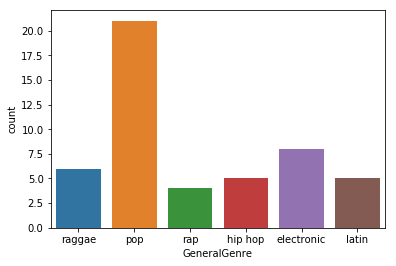

In [18]:
print(data.groupby('GeneralGenre').size())
sns.countplot(x="GeneralGenre", data=data)

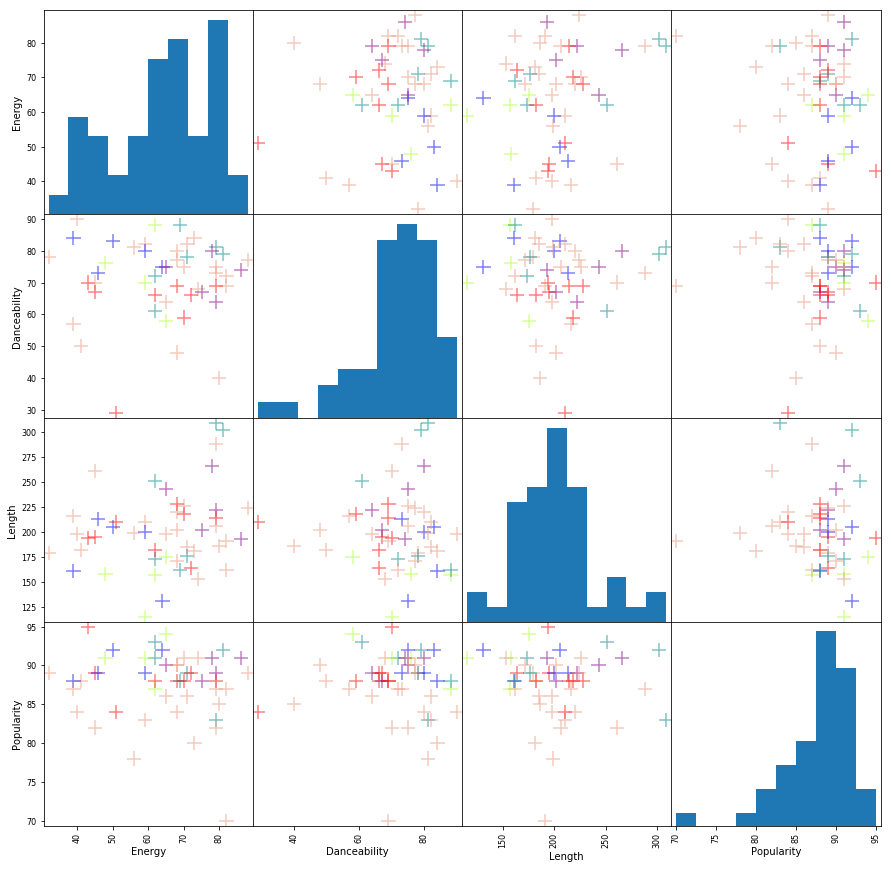

In [19]:
color_list = ['red' if i=='electronic' 
              else 'green' if i=='escape room' 
              else 'blue' if i == 'hip hop' 
              else 'purple' if i == 'latin'
              else 'darksalmon' if i == 'pop'
              else 'darkcyan' if i == 'raggae'
              else 'greenyellow' for i in data.loc[:,'GeneralGenre']]
pd.plotting.scatter_matrix(data.loc[:,['Energy','Danceability','Length','Popularity']],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '+',
                                       edgecolor= "black")
plt.show()

Supervised - KNN Method

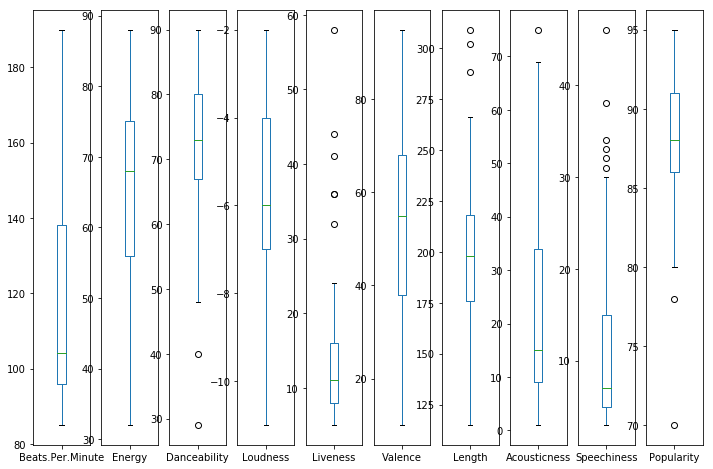

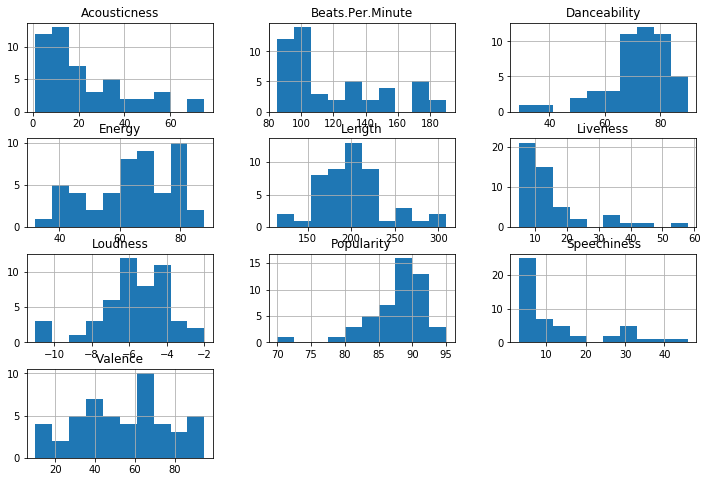

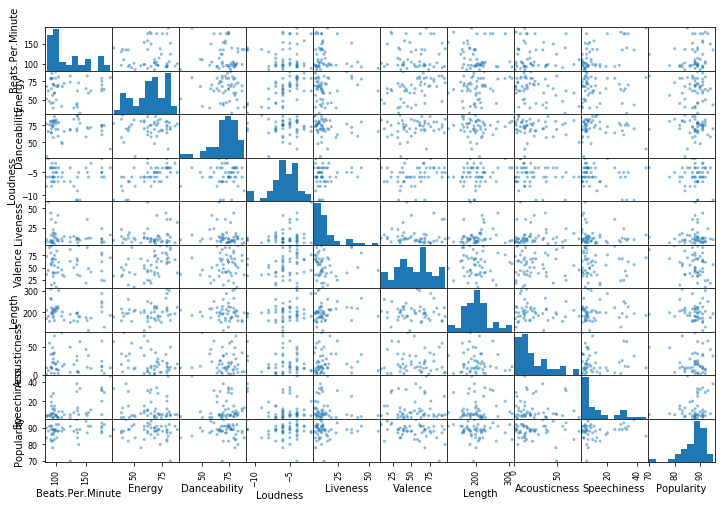

In [20]:
# box graphic
data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.gcf().set_size_inches(12, 8)
plt.show()


# histogram
data.hist()
plt.gcf().set_size_inches(12, 8)
plt.show()

# scatter plot matrix
scatter_matrix(data)
plt.gcf().set_size_inches(12, 8)
plt.show()


In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,['Beats.Per.Minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness',
                    'Speechiness','Popularity']], data.loc[:,['GeneralGenre']]

knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))
print('Real: {}'.format(data['GeneralGenre']))

Prediction: ['raggae' 'pop' 'pop' 'electronic' 'pop' 'hip hop' 'pop' 'hip hop'
 'electronic' 'latin' 'pop' 'pop' 'pop' 'hip hop' 'pop' 'latin' 'pop'
 'hip hop' 'hip hop' 'electronic' 'rap' 'raggae' 'latin' 'electronic'
 'pop' 'pop' 'pop' 'electronic' 'electronic' 'pop' 'electronic' 'raggae'
 'hip hop' 'electronic' 'pop' 'latin' 'pop' 'pop' 'pop' 'pop' 'latin'
 'electronic' 'hip hop' 'raggae' 'electronic' 'pop' 'electronic'
 'electronic' 'electronic']
Real: Unnamed: 0
1         raggae
2            pop
3            pop
4            rap
5            pop
6        hip hop
7            pop
8            rap
9     electronic
10        raggae
11           pop
12           pop
13           pop
14       hip hop
15           pop
16         latin
17           rap
18       hip hop
19        raggae
20           pop
21           rap
22        raggae
23         latin
24    electronic
25           pop
26           pop
27       hip hop
28         latin
29         latin
30    electronic
31           pop
3

C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [22]:
y

,GeneralGenre
Unnamed: 0,
1,raggae
2,pop
3,pop
4,rap
5,pop
6,hip hop
7,pop
8,rap
9,electronic


In [23]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.2


C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

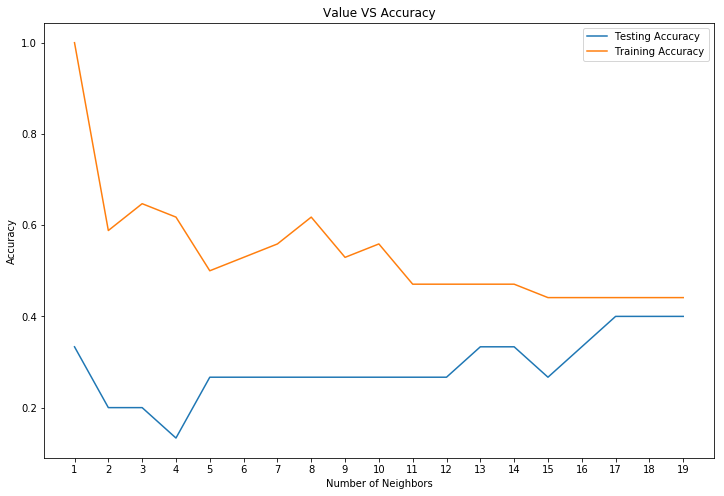

Best accuracy is 0.4 with K = 17


In [24]:
# Model complexity
neigh = np.arange(1, 20)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neigh):
    # k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[12,8])
plt.plot(neigh, test_accuracy, label = 'Testing Accuracy')
plt.plot(neigh, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neigh)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Supervised - Regression

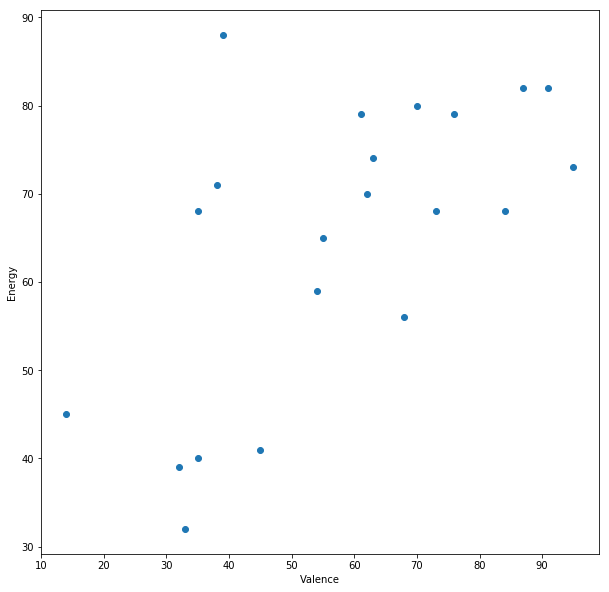

In [28]:
# create data1 that includes Valence that is feature and Energy that is target variable
data1 = data[data['GeneralGenre'] =='pop']
x1 = np.array(data1.loc[:,'Valence']).reshape(-1,1)
y1 = np.array(data1.loc[:,'Energy']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x1,y=y1)
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)

C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

x3=mms.fit_transform(x)
y3=mms.fit_transform(Y)

#Cross Validation

from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x3,y3,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

NameError: name 'LinearRegression' is not defined

In [31]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

Tuned hyperparameter k: {'n_neighbors': 17}
Best score: 0.42857142857142855


C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [32]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,['Beats.Per.Minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness',
                    'Speechiness','Popularity']], data.loc[:,['GeneralGenre']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Ajit\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Confusion matrix: 
 [[0 0 0 3 0 0]
 [0 0 0 0 0 0]
 [1 0 0 1 0 0]
 [0 1 1 4 0 1]
 [1 0 0 1 0 0]
 [0 0 0 0 1 0]]
Classification report: 
              precision    recall  f1-score   support

 electronic       0.00      0.00      0.00         3
    hip hop       0.00      0.00      0.00         0
      latin       0.00      0.00      0.00         2
        pop       0.44      0.57      0.50         7
     raggae       0.00      0.00      0.00         2
        rap       0.00      0.00      0.00         1

avg / total       0.21      0.27      0.23        15



C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


 Unsupervised - KMeans

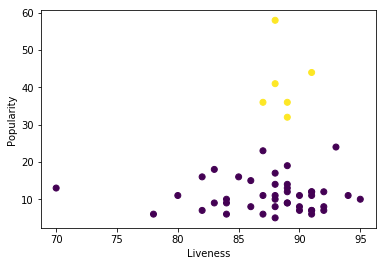

In [34]:
# KMeans Clustering
data2 = data.loc[:,['Liveness','Popularity']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['Popularity'],data['Liveness'],c = labels)
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.show()

In [35]:
#Standardization in cross tabulation table
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(x)
labels = pipe.predict(x)
df = pd.DataFrame({'labels':labels,"class":data['GeneralGenre']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   electronic  hip hop  latin  pop  raggae  rap
labels                                              
0                4        0      4   12       4    2
1                4        5      1    9       2    2


Unsupervised - Hierarchy

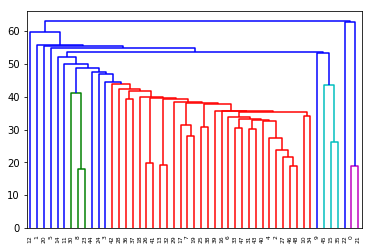

In [36]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(x,method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [37]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(x)
transformed = model.transform(x)
print('Principle components: ',model.components_)

Principle components:  [[-0.26210239  0.08658184  0.00748092  0.01197313  0.04836472  0.00496828
   0.9581298  -0.04931766 -0.02379476 -0.01521973]
 [ 0.93459295  0.06447785 -0.03985072  0.00554149 -0.04919631 -0.00787363
   0.25508981 -0.06529552  0.21988782  0.02434319]
 [-0.00352251  0.39214758  0.1066985   0.03224269  0.024445    0.87969022
  -0.05695829 -0.22840757 -0.04104243 -0.04724954]
 [ 0.0497293  -0.18707118 -0.0319213  -0.01087761  0.00283109  0.33087822
   0.07664115  0.91819006  0.03846328 -0.03846283]
 [-0.01487338 -0.40488425  0.70777634 -0.05705247 -0.54650468  0.09304625
   0.05193287 -0.09937581  0.10563905 -0.02424939]
 [-0.12315609 -0.47485501 -0.62636664 -0.08623034 -0.28107584  0.25934221
   0.02619613 -0.22511799  0.40215417 -0.01483648]
 [ 0.01321956 -0.45826616  0.26585534 -0.03899869  0.78208483  0.13027689
   0.0032739  -0.14280404  0.25352795  0.06563934]
 [-0.19865698  0.43687011  0.14718822 -0.006898   -0.02219602 -0.1396823
  -0.06429612  0.12900419  0.

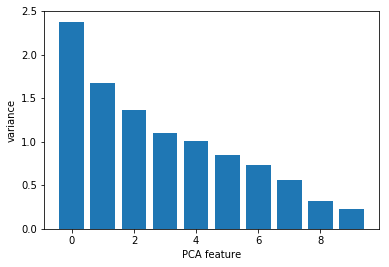

In [38]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(x)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

C:\Users\Ajit\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


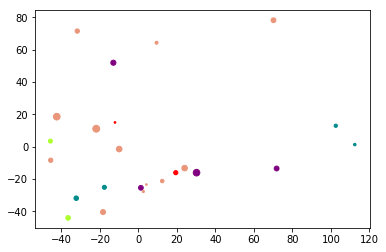

In [39]:
# apply PCA
pca = PCA(n_components = 3)
pca.fit(x)
transformed = pca.transform(x)
a = transformed[:,0]
b = transformed[:,1]
d = transformed[:,2]
plt.scatter(a,b,d,c = color_list)
plt.show()


Compare Classification Accuracy

In [40]:
# Creating dependent and independent variables
X = data.loc[:, ['Beats.Per.Minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness',
                    'Speechiness','Popularity']]
Y = data.loc[:, ['Genre']]

# Split train and test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)

In [41]:
# Creating model list
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

results = []
names = []

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

for name, model in models:
    kfold = model_selection.KFold(n_splits=12, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.138889 (0.164336)
LDA: 0.222222 (0.157135)
KNN: 0.055556 (0.124226)


C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

DT: 0.055556 (0.124226)
NB: 0.083333 (0.144338)
SVM: 0.048611 (0.110021)


C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [42]:
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)

print('accuracy value :', accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

accuracy value : 0.0
[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
                  precision    recall  f1-score   support

        boy band       0.00      0.00      0.00         1
canadian hip hop       0.00      0.00      0.00         1
     country rap       0.00      0.00      0.00         1
       dance pop       0.00      0.00      0.00         2
             edm       0.00      0.00      0.00         1
           latin       0.00      0.00      0.00         3
  panamanian pop       0.00      0.00      0.00         1
             pop       0.00      0.00      0.00         0

     avg / total       0.00      0.00      0.00        10



C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [43]:
print_score(classifier,x_train,y_train,x_test,y_test,train=True)

NameError: name 'print_score' is not defined

In [44]:
print_score(classifier,x_train,y_train,x_test,y_test,train=False)

NameError: name 'print_score' is not defined